In [337]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [338]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import warnings


Helper function for visualisations

In [339]:
def plot_sidebyside(data, title=None):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create 3 subplots side by side
    for i in range(len(data)):
        plot_subgraph(data[i], axes[i])  # Pass axes[i] to plot on the respective subplot
    if title:
        fig.title(title)
    else:
        fig.title("Scatterplot Comparison")
    plt.tight_layout()
    plt.show()

def plot(x, y, title=None):
    plt.figure(figsize=(4, 3))
    plt.scatter(x, y, color='red', s=3) 
    plt.xlabel("X values")
    plt.ylabel("Y values")
    if title:
        plt.title(title)
    else:
        plt.title("Scatterplot Comparison")
    plt.grid(True)
    plt.show()

def plot_comparison(values1, values2, title=None):
    plt.figure(figsize=(4, 3))
    plt.scatter(values1[0], values1[1], color='red', label='Actual Values', s=3) 
    plt.scatter(values2[0], values2[1], color='blue', label='Predicted Values',s =3) 
    plt.xlabel("X values")
    plt.ylabel("Y values")
    if title:
        plt.title(title)
    else:
        plt.title("Scatterplot Comparison")
    plt.grid(True)
    plt.legend()
    plt.show()

Generating and pre-preparing the datasets

In [340]:
def generate_polynomial_dataset(degree, n_samples):
    X = np.random.uniform(-5, 5, n_samples).reshape(-1, 1)
    y = []
    for xi in X:
        sum = 0
        for ki in range(degree + 1):
            ak = np.random.uniform(0, 1)
            term = ak * (xi ** ki)
            sum += term
        e = np.random.normal(0, 1)
        yi = sum + e
        y.append(yi)
    return X, y

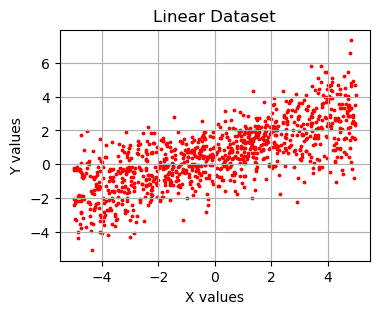

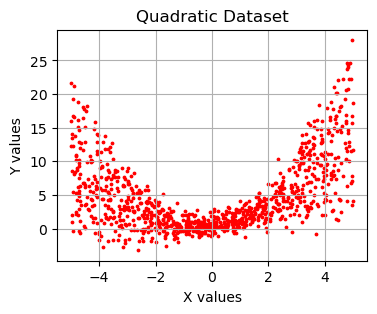

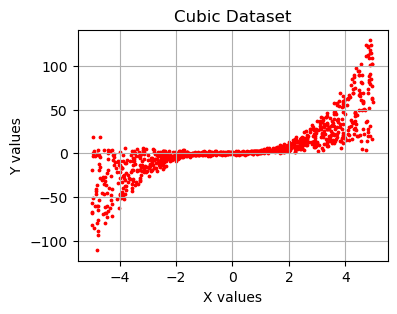

In [341]:
X_linear, y_linear = generate_polynomial_dataset(1, 1000)
X_quad, y_quad = generate_polynomial_dataset(2, 1000)
X_cubic, y_cubic = generate_polynomial_dataset(3, 1000)

plot(X_linear, y_linear, "Linear Dataset")
plot(X_quad, y_quad, "Quadratic Dataset")
plot(X_cubic, y_cubic, "Cubic Dataset")

X_quad = np.hstack((X_quad, X_quad**2))
X_cubic = np.hstack((X_cubic, X_cubic**2, X_cubic**3))
X_cubic = StandardScaler().fit_transform(X_cubic)

X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X_linear, y_linear, test_size=0.2)
X_quad_train, X_quad_test, y_quad_train, y_quad_test = train_test_split(X_quad, y_quad, test_size=0.2)

X_cubic_train, X_cubic_test, y_cubic_train, y_cubic_test = train_test_split(X_cubic, y_cubic, test_size=0.2)

In [342]:
alpha_choices = [0, 0.1, 100]

Closed Form Ridge Regression

In [343]:
class RidgeRegression_ClosedForm():
    def __init__(self, alpha = 0.5):
        self.alpha = alpha
        self.weights = None

    def train(self, X, y):
        X = np.insert(X, X.shape[1], 1, axis=1)
        biased_i = np.identity(len(X[0]))
        biased_i[0,0] = 0
        XT = np.transpose(X)
        self.weights = np.linalg.inv((XT @ X) + self.alpha * biased_i) @ XT @ y

    def predict(self, X):
        X = np.insert(X, X.shape[1], 1, axis=1)
        return X @ self.weights

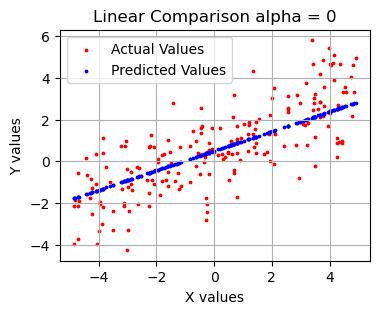

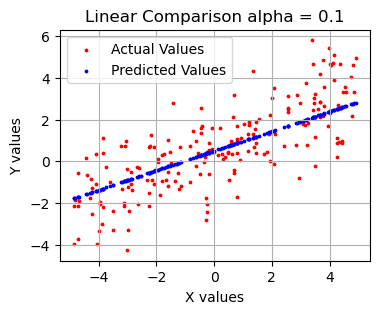

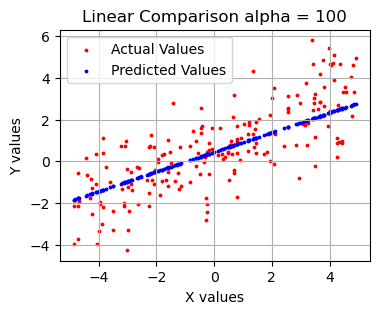

In [344]:
for alpha in alpha_choices:
    linear_reg_cf = RidgeRegression_ClosedForm(alpha = alpha)
    linear_reg_cf.train(X_linear_train, y_linear_train)
    y_linear_predicted = linear_reg_cf.predict(X_linear_test)
    plot_comparison([X_linear_test, y_linear_test], [X_linear_test, y_linear_predicted], f'Linear Comparison alpha = {alpha}')

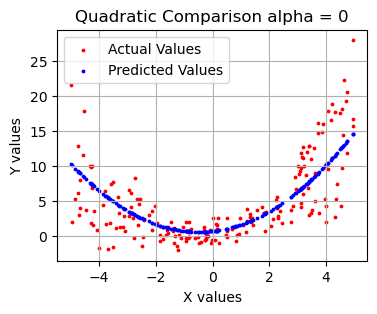

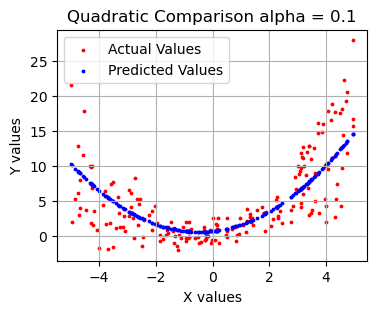

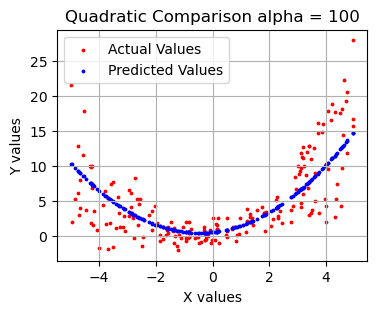

In [345]:
for alpha in alpha_choices:
    quad_reg_cf = RidgeRegression_ClosedForm(alpha = alpha)
    quad_reg_cf.train(X_quad_train, y_quad_train)
    y_quad_predicted = quad_reg_cf.predict(X_quad_test)
    plot_comparison([X_quad_test[:,0], y_quad_test], [X_quad_test[:,0], y_quad_predicted], f'Quadratic Comparison alpha = {alpha}')

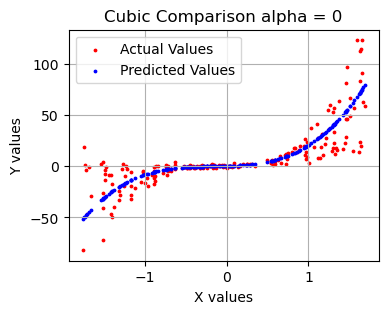

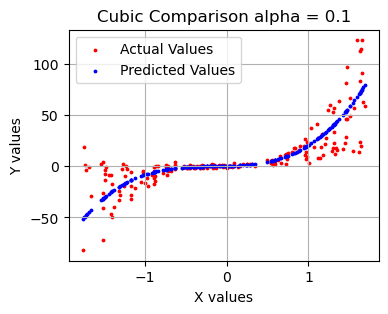

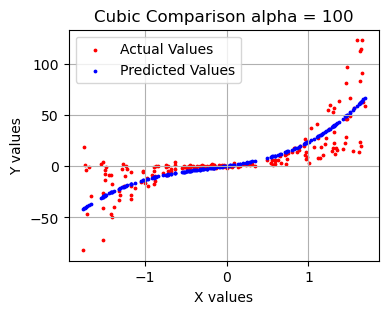

In [346]:
for alpha in alpha_choices:
    cubic_reg_cf = RidgeRegression_ClosedForm(alpha = alpha)
    cubic_reg_cf.train(X_cubic_train, y_cubic_train)
    y_cubic_predicted = cubic_reg_cf.predict(X_cubic_test)
    plot_comparison([X_cubic_test[:,0], y_cubic_test], [X_cubic_test[:,0], y_cubic_predicted], f'Cubic Comparison alpha = {alpha}')

Scikit learn SGD regression

In [347]:

MAX_ITERATIONS = 1000
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

def predict_SGDReg(X, Y, X_test, alpha):
    sgd_reg = SGDRegressor(penalty='l2', alpha=alpha, max_iter=MAX_ITERATIONS)
    sgd_reg.fit(X, Y)
    return sgd_reg.predict(X_test)

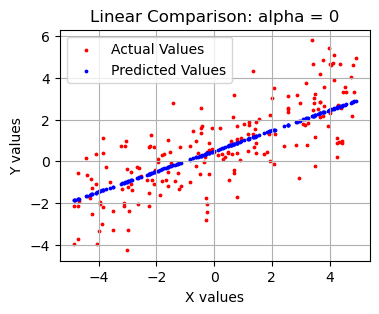

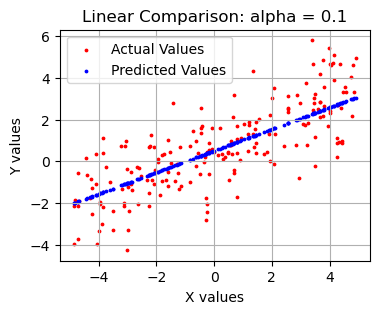

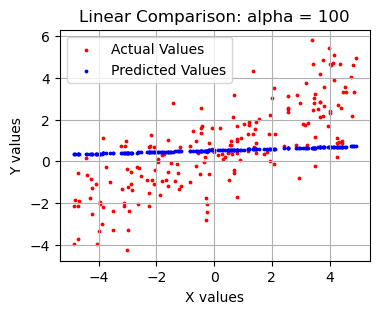

In [348]:
for alpha in alpha_choices:
    y_linear_predicted = predict_SGDReg(X_linear_train, y_linear_train, X_linear_test, alpha)
    plot_comparison([X_linear_test, y_linear_test], [X_linear_test, y_linear_predicted], f'Linear Comparison: alpha = {alpha}')

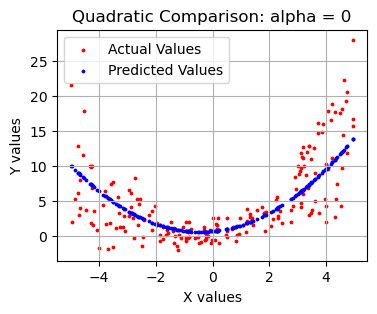

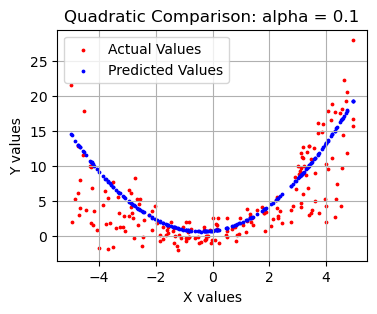

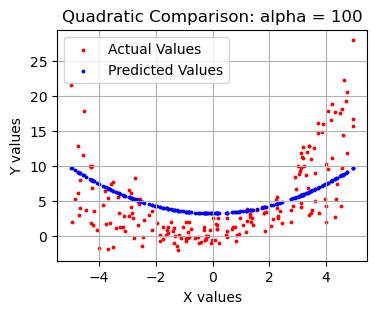

In [349]:
for alpha in alpha_choices:
    y_quad_predicted = predict_SGDReg(X_quad_train, y_quad_train, X_quad_test, alpha)
    plot_comparison([X_quad_test[:,0], y_quad_test], [X_quad_test[:,0], y_quad_predicted], f'Quadratic Comparison: alpha = {alpha}')


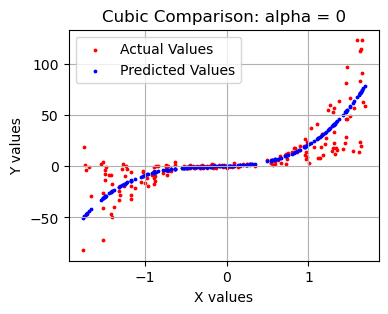

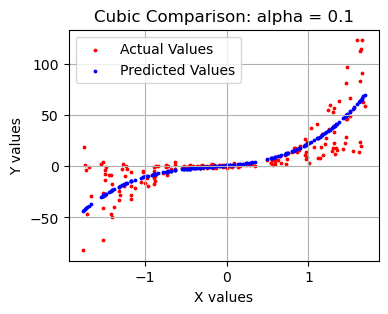

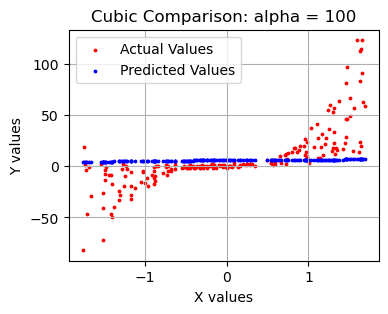

In [350]:
for alpha in alpha_choices:
    y_cubic_predicted = predict_SGDReg(X_cubic_train, y_cubic_train, X_cubic_test, alpha)
    plot_comparison([X_cubic_test[:,0], y_cubic_test], [X_cubic_test[:,0], y_cubic_predicted], f'Cubic Comparison: alpha = {alpha}')
    